In [79]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import svm
import time
from sklearn.metrics import classification_report
import matplotlib

### Loading training set and test set

In [126]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

### Define training set and test set

In [127]:
#Define 0 as the labels for the training images of 6
train_images_6 = train_images[train_labels == 6]
train_images_6 = train_images_6.reshape(train_images_6.shape[0], 28*28)
train_labels_6 = np.zeros(train_images_6.shape[0])

#Define 1 as the labels for the training images of 2
train_images_2 = train_images[train_labels == 2]
train_images_2 = train_images_2.reshape(train_images_2.shape[0], 28*28)
train_labels_2 = np.ones(train_images_2.shape[0])

#Merge two dataset together
X_training = np.concatenate((train_images_6, train_images_2), axis=0)
Y_training = np.concatenate((train_labels_6, train_labels_2), axis=0)

#Check the balance between two dataset
print ("Shape of 6s training set:", train_images_6.shape)
print ("Shape of 2s training set:", train_images_2.shape)

Shape of 6s training set: (5918, 784)
Shape of 2s training set: (5958, 784)


In [128]:
#Define 0 as the labels for the test images of 6
test_images_6 = test_images[test_labels == 6]
test_images_6 = test_images_6.reshape(test_images_6.shape[0], 28*28)
test_labels_6 = np.zeros(test_images_6.shape[0])

#Define 1 as the labels for the test images of 2
test_images_2 = test_images[test_labels == 2]
test_images_2 = test_images_2.reshape(test_images_2.shape[0], 28*28)
test_labels_2 = np.ones(test_images_2.shape[0])

#Merge two dataset together
X_test = np.concatenate((test_images_6, test_images_2), axis=0)
Y_test = np.concatenate((test_labels_6, test_labels_2), axis=0)

In [129]:
#Checking the shape of the dataset
print ("Number of training set:", X_training.shape[0])
print ("Test set data shape:", X_test.shape[0])

Number of training set: 11876
Test set data shape: 1990


### Plot some of the samples

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 11875 + 1) instead
  """Entry point for launching an IPython kernel.


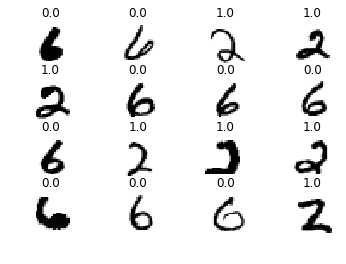

In [131]:
samples = np.random.random_integers(0, X_training.shape[0]-1, size=16)
pos = 1
for sample in samples:
    plt.subplot(4,4, pos)
    plt.axis('off')
    plt.imshow(X_training[sample].reshape(28,28), cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.title (Y_training[sample])
    pos += 1

### SVC with linear kernel

In [100]:
linear_model = svm.SVC(kernel='linear')
start_time = time.time()
linear_model.fit(X_training, Y_training)
end_time = time.time()
print ("Training time:", end_time-start_time)

Y_pred = linear_model.predict (X_test)
target_names = ['Number 6s', 'Number 2s']

print ("Accuracy on the training set:", linear_model.score(X_training, Y_training))
print ("Accuracy on the test set:", linear_model.score(X_test, Y_test))
print ("Confusion matrix:")
print (classification_report (Y_test, Y_pred, target_names=target_names))

Training time: 10.417808771133423
Accuracy on the training set: 1.0
Accuracy on the test set: 0.9778894472361809
Confusion matrix:
             precision    recall  f1-score   support

  Number 6s       0.98      0.97      0.98       958
  Number 2s       0.98      0.98      0.98      1032

avg / total       0.98      0.98      0.98      1990



### SVC with poly kernel

In [132]:
poly_model = svm.SVC(kernel='poly')
start = time.time()
poly_model.fit(X_training, Y_training)
end = time.time()
print ("Training time:", end-start)

Y_pred = poly_model.predict (X_test)
target_names = ['Number 6s', 'Number 2s']

print ("Accuracy on the training set:", poly_model.score(X_training, Y_training))
print ("Accuracy on the test set:", poly_model.score(X_test, Y_test))
print ("Confusion matrix:")
print (classification_report (Y_test, Y_pred, target_names=target_names))

Training time: 4.613796710968018
Accuracy on the training set: 1.0
Accuracy on the test set: 0.9949748743718593
Confusion matrix:
             precision    recall  f1-score   support

  Number 6s       0.99      1.00      0.99       958
  Number 2s       1.00      0.99      1.00      1032

avg / total       0.99      0.99      0.99      1990



### SVC with RBF kernel

In [105]:
rbf_model = svm.SVC(kernel='rbf')
start = time.time()
rbf_model.fit(X_training, Y_training)
end = time.time()
print ("Training time:", end-start)

Y_pred = rbf_model.predict (X_test)
target_names = ['Number 6s', 'Number 2s']

print ("Accuracy on the training set:", rbf_model.score(X_training, Y_training))
print ("Accuracy on the test set:", rbf_model.score(X_test, Y_test))
print ("Confusion matrix:")
print (classification_report (Y_test, Y_pred, target_names=target_names))

Training time: 220.04766869544983
Accuracy on the training set: 1.0
Accuracy on the test set: 0.5185929648241207
Confusion matrix:
             precision    recall  f1-score   support

  Number 6s       0.00      0.00      0.00       958
  Number 2s       0.52      1.00      0.68      1032

avg / total       0.27      0.52      0.35      1990



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
print ("Predicted 2s:", np.sum (Y_pred == 1))
print ("Predicted 6s:", np.sum(Y_pred == 0))

Predicted 2s: 1990
Predicted 6s: 0
